<a href="https://colab.research.google.com/github/phoenix-hacks/Tensor-Titans/blob/main/tensor_titans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2


In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [120]:

import os

path = os.listdir(r'/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [121]:
import cv2
import os

# Get the path to the dataset from the kagglehub cache
dataset_path = '/root/.cache/kagglehub/datasets/sartajbhuvaji/brain-tumor-classification-mri/versions/2/'

X = []
Y = []
for cls in classes:
    # Construct the correct path to the class folder within the dataset
    pth = os.path.join(dataset_path, 'Training', cls)

    # Check if the path exists and print a message if it doesn't
    if not os.path.exists(pth):
        print(f"Warning: Path {pth} does not exist. Skipping this class.")
        continue  # Skip to the next class if the path doesn't exist

    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)

        # Check if the image was loaded successfully
        if img is None:
            print(f"Warning: Failed to load image {os.path.join(pth, j)}. Skipping this image.")
            continue  # Skip to the next image if loading failed
            X.append(img)
        Y.append(classes[cls])




In [122]:
img = cv2.resize(img, (200,200))
X.append(img)
Y.append(classes[cls])

In [123]:
np.unique(Y)

array([0, 1])

In [124]:
pd.Series(Y).value_counts()

,count
1,828
0,395


In [125]:

X = np.array(X) # Convert the list X to a NumPy array
# Now you can access X.shape
X_updated = X.copy() # Creating a copy of X and assigning it to X_updated. You can modify X_updated as needed.
X.shape, X_updated.shape # Accessing the shape of both X and X_updated

((1, 200, 200), (1, 200, 200))

In [126]:
X.shape, X_updated.shape

((1, 200, 200), (1, 200, 200))

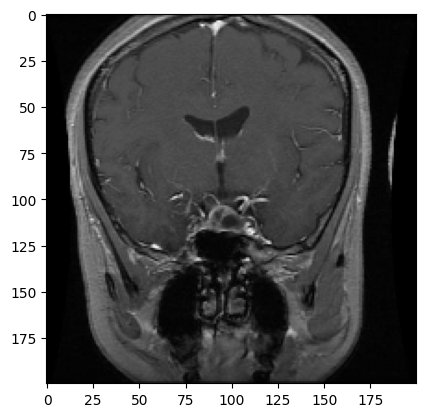

In [127]:
plt.imshow(X[0], cmap='gray')


In [128]:
X_updated = X.reshape(len(X), -1)
X_updated.shape


(1, 40000)

In [129]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)


ValueError: Found input variables with inconsistent numbers of samples: [1, 1223]

In [130]:

xtrain.shape, xtest.shape


((977, 40000), (245, 40000))

In [131]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

1.0 0.0
1.0 0.0
0.00392156862745098 0.0
0.00392156862745098 0.0


In [132]:
from sklearn.decomposition import PCA

In [133]:

print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [134]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [136]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)


LogisticRegression(C=0.1)

In [137]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [138]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 0.6786079836233367
Testing Score: 0.6693877551020408


In [139]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9877175025588536
Testing Score: 0.9714285714285714


In [140]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 52,  90,  94, 124, 127, 172, 229]),)

In [141]:
pred[36]

1

In [143]:
ytest[36]

1

In [144]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

In [158]:
plt.figure(figsize=(12,8))
p = os.listdir('/Users/moahm/Downloads/brain-tumor-detection-master/brain-tumor-detection-master/brain_tumor/Testing/pituitary_tumor')
c=1
for i in os.listdir('/Users/moahm/Downloads/brain-tumor-detection-master/brain-tumor-detection-master/brain_tumor/Testing/no_tumor')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/Users/moahm/Downloads/brain-tumor-detection-master/brain-tumor-detection-master/brain_tumor/Testing/no_tumor'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [148]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9877175025588536
Testing Score: 0.9714285714285714


In [149]:
pred = sv.predict(xtest)

In [150]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 52,  90,  94, 124, 127, 172, 229]),)

In [151]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  7
1 1


In [152]:
dec = {0:'No Tumor', 1:'Positive Tumor'}